In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [165]:
df = pd.read_csv('./Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [167]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
df.shape

(891, 12)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [170]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [172]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [173]:
df.duplicated().sum()

np.int64(0)

# target variable = survived

Text(0.5, 1.0, 'Survival Rate')

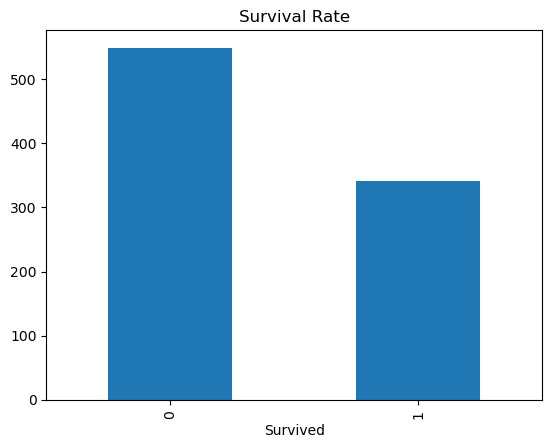

In [174]:
df['Survived'].value_counts().plot(kind = 'bar')
plt.title("Survival Rate")

In [175]:
df_copy = df.copy()

In [176]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
categorical_feature = []
numeric_feature = []

cols = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

for col in cols: 
    if df_copy[col].dtype == 'object':
        if col != 'Name':
            categorical_feature.append(col) 
    elif df_copy[col].dtype in ['int64', 'int32'] and df_copy[col].nunique() < 20: 
        if col != 'Survived': 
            categorical_feature.append(col)
    else:
        if col != 'PassengerId':
            numeric_feature.append(col)

In [178]:
categorical_feature

['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

In [179]:
numeric_feature

['Age', 'Fare']

In [180]:
df_copy['title'] = df_copy['Name'].str.extract(" ([A-Za-z]+)\.", expand = False)

In [181]:
df_copy['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [182]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [183]:
df_copy['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [184]:
df_copy['Age']= df_copy.groupby('title')['Age'].transform(lambda x : x.fillna(x.median()))

In [185]:
df_copy['Age'].isnull().sum()

np.int64(0)

In [186]:
 df_copy['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [187]:
df_copy['deck'] = df_copy['Cabin'].str[0]

In [188]:
df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [189]:
df_copy['deck'] = df_copy['deck'].fillna('Unknown')

In [190]:
df_copy['deck'].isna().sum()

np.int64(0)

In [191]:
df_copy.drop(columns= ['Cabin'], inplace= True)

In [192]:
df_copy['deck'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [193]:
categorical_feature.remove('Cabin')

In [194]:
categorical_feature.append('deck')

In [195]:
categorical_feature

['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'deck']

In [196]:
df_copy['Ticket'].nunique()

681

In [197]:
df_copy['ticket_size'] = df_copy.groupby('Ticket')['PassengerId'].transform('count')
df_copy['ticket_size']

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: ticket_size, Length: 891, dtype: int64

In [198]:
df_copy['is_alone'] = (df_copy['ticket_size'] == 1).astype(int)

In [199]:
df_copy['Sex'].unique()

array(['male', 'female'], dtype=object)

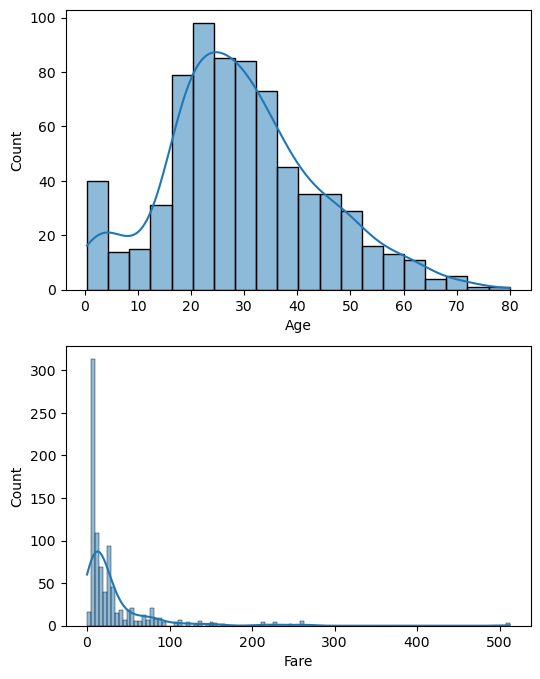

In [200]:
plt.figure(figsize=(6,8))

def numericplot(col, num):
    plt.subplot(2, 1, num)
    sns.histplot(df[col], kde = True)

i = 1
for col in numeric_feature:
    numericplot(col, i) 
    i = i+1

In [201]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'title', 'deck', 'ticket_size',
       'is_alone'],
      dtype='object')

In [202]:
df_copy.drop(columns= ['Name', 'Ticket'], inplace=True)

In [203]:
categorical_feature.remove('Ticket')

In [204]:
categorical_feature

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'deck']

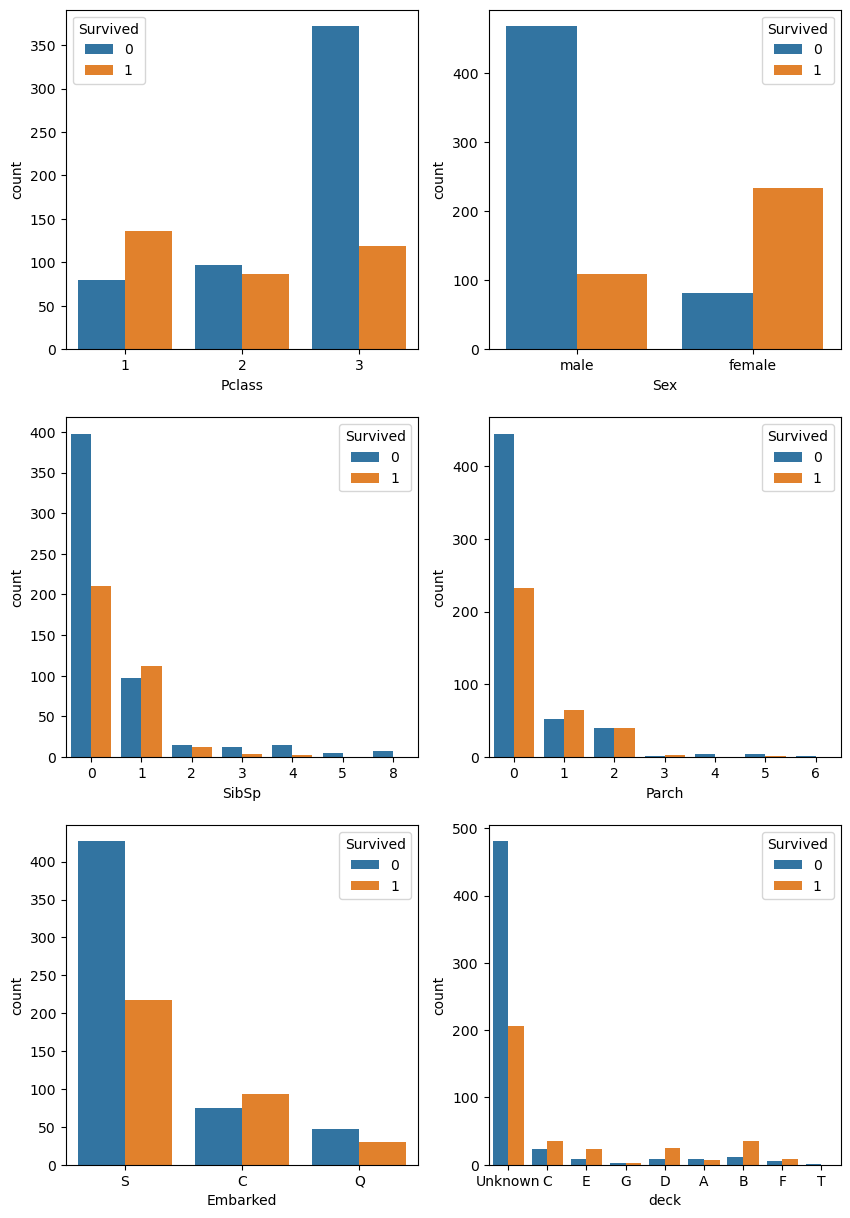

In [205]:
plt.figure(figsize= (10, 15))

def categoricalplot(col, num): 
    plt.subplot(3, 2, num) 
    sns.countplot(x = df_copy[col], hue= df_copy['Survived'])

i = 1 
for col in categorical_feature: 
    categoricalplot(col, i) 
    i += 1 

In [206]:
numeric_feature

['Age', 'Fare']

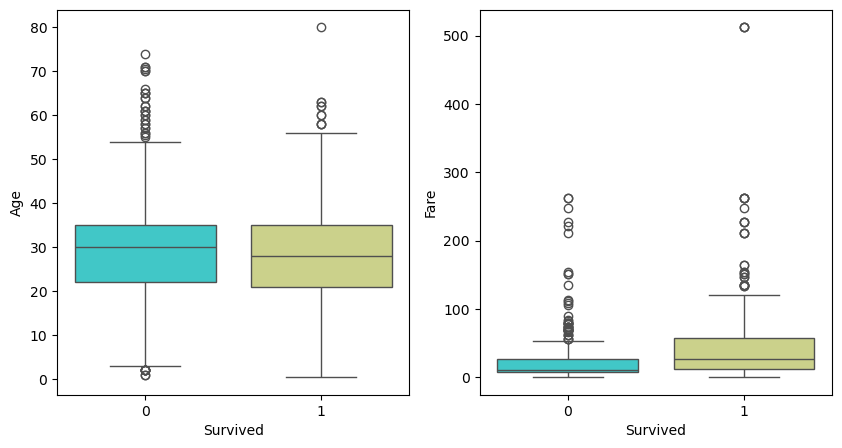

In [207]:
plt.figure(figsize=(10, 5))

def numericfeature(col, num):
    plt.subplot(1, 2, num) 
    sns.boxplot(data=df_copy, y = col, x = 'Survived', palette= 'rainbow')

i = 1 
for col in numeric_feature: 
    numericfeature(col, i)
    i += 1

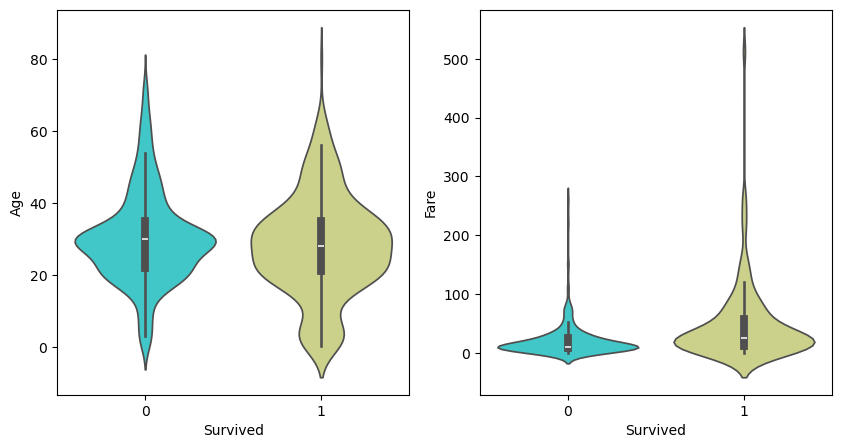

In [208]:
plt.figure(figsize=(10, 5))

def numericfeature(col, num):
    plt.subplot(1, 2, num) 
    sns.violinplot(data=df_copy, y = col, x = 'Survived', palette= 'rainbow')

i = 1 
for col in numeric_feature: 
    numericfeature(col, i)
    i += 1

<Axes: >

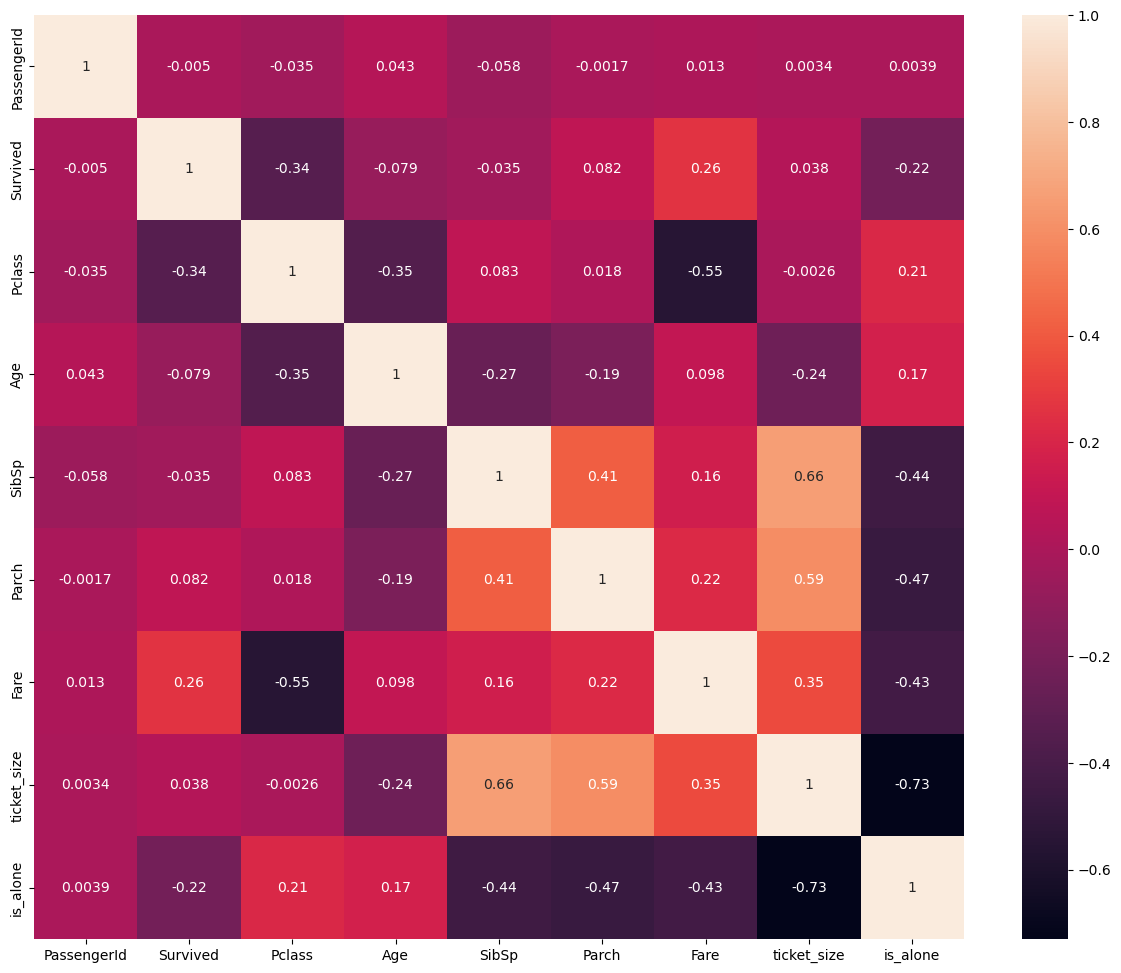

In [209]:
plt.figure(figsize= (15, 12))
sns.heatmap(df_copy.corr(numeric_only=True), annot = True)

In [210]:
df_copy['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [211]:
for col in ['SibSp', 'Parch', 'ticket_size']:
    numeric_feature.append(col)

In [212]:
numeric_feature

['Age', 'Fare', 'SibSp', 'Parch', 'ticket_size']

In [213]:
categorical_feature

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'deck']

In [214]:
binary_feature = ['is_alone']

In [215]:
df_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,deck,ticket_size,is_alone
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,Unknown,1,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,Unknown,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,C,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,Unknown,1,1


In [216]:
df_cleaned = pd.get_dummies(df_copy, drop_first= True)
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_size,is_alone,Sex_male,...,title_Rev,title_Sir,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Unknown
0,1,0,3,22,1,0,7,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38,1,0,71,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26,0,0,7,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35,1,0,53,2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,35,0,0,8,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [217]:
df_cleaned.drop(columns= 'PassengerId', inplace= True)

In [218]:
df_cleaned.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'ticket_size',
       'is_alone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'title_Col',
       'title_Countess', 'title_Don', 'title_Dr', 'title_Jonkheer',
       'title_Lady', 'title_Major', 'title_Master', 'title_Miss', 'title_Mlle',
       'title_Mme', 'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev',
       'title_Sir', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'deck_T', 'deck_Unknown'],
      dtype='object')

In [219]:
from sklearn.preprocessing import StandardScaler

cols = ['Pclass', 'Age', 'SibSp', 'ticket_size']
scalar = StandardScaler()

df_cleaned[cols] = scalar.fit_transform(df_cleaned[cols])
df_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_size,is_alone,Sex_male,Embarked_Q,...,title_Rev,title_Sir,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Unknown
0,0,0.827377,-0.555502,0.432793,0,7,-0.579162,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.566107,0.650228,0.432793,0,71,-0.579162,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.827377,-0.254069,-0.474545,0,7,-0.579162,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,-1.566107,0.424154,0.432793,0,53,0.155928,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.827377,0.424154,-0.474545,0,8,-0.579162,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [223]:
numeric_feature

['Age', 'Fare', 'SibSp', 'Parch', 'ticket_size', 'Pclass']

In [225]:
categorical_feature = ['is_alone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'title_Col',
       'title_Countess', 'title_Don', 'title_Dr', 'title_Jonkheer',
       'title_Lady', 'title_Major', 'title_Master', 'title_Miss', 'title_Mlle',
       'title_Mme', 'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev',
       'title_Sir', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'deck_T', 'deck_Unknown']

In [226]:
categorical_feature

['is_alone',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'title_Col',
 'title_Countess',
 'title_Don',
 'title_Dr',
 'title_Jonkheer',
 'title_Lady',
 'title_Major',
 'title_Master',
 'title_Miss',
 'title_Mlle',
 'title_Mme',
 'title_Mr',
 'title_Mrs',
 'title_Ms',
 'title_Rev',
 'title_Sir',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_T',
 'deck_Unknown']

In [227]:
from scipy.stats import pearsonr

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['Survived'])[0]
    for feature in numeric_feature
}

corr_df = pd.DataFrame(list(correlations.items()), columns= ['Feature', 'Correlation'])
corr_df = corr_df.sort_values(by = 'Correlation', ascending= False)
corr_df

,Feature,Correlation
1,Fare,0.257482
3,Parch,0.081629
4,ticket_size,0.038247
2,SibSp,-0.035322
0,Age,-0.078791
5,Pclass,-0.338481


In [228]:
from scipy.stats import chi2_contingency

chi2_result = {}
alpha = 0.05

for col in categorical_feature: 
    contigency = pd.crosstab(df_cleaned[col], df_cleaned['Survived'])

    chi2, p_val, _, _ = chi2_contingency(contigency)

    desision = 'Reject Null (Accept Feature)' if p_val < alpha else 'Accept Null (Reject Feature)'

    chi2_result[col] = {
        'Chi2': chi2,
        'P_val': p_val, 
        'Decision': desision
    }

chi2_df = pd.DataFrame(chi2_result).T
chi2_df = chi2_df.sort_values(by = 'P_val')
chi2_df

,Chi2,P_val,Decision
title_Mr,266.459805,0.0,Reject Null (Accept Feature)
Sex_male,260.71702,0.0,Reject Null (Accept Feature)
title_Mrs,100.421346,0.0,Reject Null (Accept Feature)
title_Miss,93.666699,0.0,Reject Null (Accept Feature)
deck_Unknown,87.941486,0.0,Reject Null (Accept Feature)
is_alone,43.215521,0.0,Reject Null (Accept Feature)
deck_B,25.72958,0.0,Reject Null (Accept Feature)
Embarked_S,20.879898,0.000005,Reject Null (Accept Feature)
deck_D,18.631492,0.000016,Reject Null (Accept Feature)
deck_E,17.244804,0.000033,Reject Null (Accept Feature)


In [230]:
df_final = df_cleaned[['Pclass', 'Fare', 'title_Mr', 'Sex_male', 'title_Mrs', 'title_Miss', 'deck_Unknown', 'is_alone', 
                       'deck_B', 'Embarked_S', 'deck_D', 'deck_E', 'deck_C', 'title_Master'                       
            ]]

In [232]:
df_final.head()

,Pclass,Fare,title_Mr,Sex_male,title_Mrs,title_Miss,deck_Unknown,is_alone,deck_B,Embarked_S,deck_D,deck_E,deck_C,title_Master
0,0.827377,7,1,1,0,0,1,1,0,1,0,0,0,0
1,-1.566107,71,0,0,1,0,0,1,0,0,0,0,1,0
2,0.827377,7,0,0,0,1,1,1,0,1,0,0,0,0
3,-1.566107,53,0,0,1,0,0,0,0,1,0,0,1,0
4,0.827377,8,1,1,0,0,1,1,0,1,0,0,0,0
